In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

[-0.81335295 -1.03137053 -0.1619504   1.05681487 -0.32327122  1.97360372
  0.53768487  2.00567951  0.37505631 -1.63634754 -0.94388588 -0.182368
  1.09467683  1.3688104   0.08250702 -1.06162907  1.29128084 -0.27881294
  0.55825768  0.6725047 ]


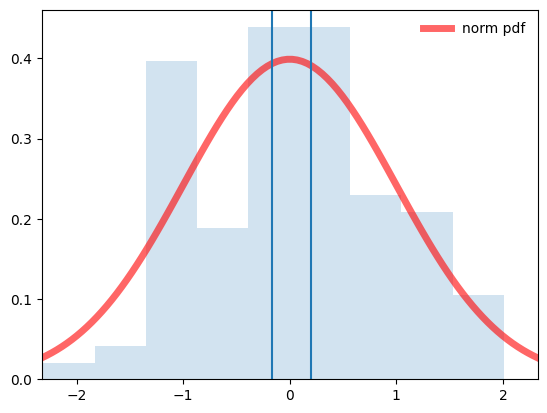

lb= -0.16167629771246236 ub= 0.20043765805598204


In [ ]:
fig, ax = plt.subplots(1, 1)

# Display the Normal/Gaussian probability density function (pdf):
x = np.linspace(st.norm.ppf(0.01), st.norm.ppf(0.99), 100)
ax.plot(x, st.norm.pdf(x), 'r-', lw=5, alpha=0.6, label='norm pdf')

# generate random samples
rand_samples = st.norm.rvs(size=100)
print(rand_samples[:20])

# plot histogram of count of the random points generated above
ax.hist(rand_samples, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
# Note: there are more points in the region where the PDF is high

# get interval lower-bound, upper-bound from the random samples
lb, ub = st.norm.interval(0.95, loc=np.mean(rand_samples), scale=st.sem(rand_samples))
ax.axvline(x=lb)
ax.axvline(x=ub)
plt.show()
print("lb=", lb, "ub=", ub)

# Now re-run this cell with more no. of samples (size=500), (size=1000)
# You will see the confidence interval has shrunk, i.e it is getting more accurate.

In [ ]:
# Note: 99% confidence interval is wider than 95%
st.norm.interval(0.99, loc=np.mean(rand_samples), scale=st.sem(rand_samples))

(-0.21856852344874877, 0.25732988379226845)

Higher confidence interval minimises the error assuming the basic assumption is true which is - samples are drawn from the underlying target distribution.
Hence should we always use 99% confidence interval ? No, doing this will make the interval too wide. Even if sample mean is far from the actual mean, it may still lie within the interval and then we may assume the sample-mean as a correct estimation. Thus using a smaller confidence interval will make our estimates more conservative/accurate i.e likely nearer to the actual mean.

In [ ]:
# Similarly you can generate confidence intervals based on t-distribution assumption
# This yields a wider interval
st.t.interval(0.95, len(rand_samples)-1, loc=np.mean(rand_samples), scale=st.sem(rand_samples))

(-0.1639167311789458, 0.2026780915224655)

# Question 1
In the population, the average IQ is 100 with a standard deviation of 15. A team of scientists want to test a new medication to see if it has either a positive or negative effect on intelligence, or not effect at all. A sample of 30 participants who have taken the medication has a mean of 140. Did the medication affect intelligence?

# Solution
Null Hypothesis $H_0$ = medication does not affect intelligence i.e new population mean will be same as 100.

Alternate Hypothesis $H_a$ = medication does affect intelligence i.e new population mean != 100.

Here we calculate the 95% confidence interval along the observed mean of 140.

i. If the previous mean of 100 is outside of this interval, then we see that 140 is too far a deviation i.e within the 5% critical region and hence reject $H_0$ i.e. medication does affect intelligence!

ii. Otherwise accept $H_0$ i.e medication does not affect intelligence.

In [ ]:
n = 30
observed_mean = 140
previous_population_mean = 100
populqtion_stdev = 15

# As per Central Limit Them. sample mean has a normal distribution,
# hence, assuming normal distribution, 95% confidence interval is:
# observed_mean +- 1.96(populqtion_stdev / sqrt(n))
lower_bound = observed_mean - 1.96*(populqtion_stdev / np.sqrt(n))
upper_bound = observed_mean + 1.96*(populqtion_stdev / np.sqrt(n))
print("the 95% confidence interval = (", lower_bound, upper_bound, ")")

is_in_confidence_interval = lower_bound <= previous_population_mean and previous_population_mean <= upper_bound
print(f"does previous_population_mean {previous_population_mean} lies within the 95% confidence interval ?", "yes" if is_in_confidence_interval else "No")

if is_in_confidence_interval:
  print(f"At 95% confidence interval the new populatoin mean can still be the same as the previous_population_mean {previous_population_mean}")
  print("Hence we accept H_0 that the new population mean will not change. Hence, medication has NO Effect on the intelligence.")

if not is_in_confidence_interval:
  print(f"The observed mean {observed_mean} is too far from the previous_population_mean {previous_population_mean} i.e. lies in the critical region: [.. < {lower_bound} or {upper_bound} < ...]")
  print(f"At 95% confidence interval the new population mean CANNOT be the same as the previous_population_mean {previous_population_mean}")
  print("Hence we reject H_0 i.e. the new population mean will change. Hence, medication Has affected the intelligence!")

print("----------------------------------------------------------------------------------------------------------------------\n")

# Or instead of computing the interval, we can just get the z_score.
# if z_score > 1.96 then it is too far i.e. in the critical region and then reject H_0.
# Note 1.96 is also calledas "Z_0.025" i.e P(Z>1.96) = 0.025 (2.5%)
z_score = (observed_mean - previous_population_mean) / (populqtion_stdev / np.sqrt(n))
print("z_score =", z_score, " is it > 1.96 ?", "yes" if z_score > 1.96 else "No")

if z_score > 1.96:
  print(f"Therefore, observed_mean {observed_mean} is too far from the previous_population_mean {previous_population_mean} and lies in the critical region.")
  print("Hence we reject H_0 i.e. the new population mean will change. Hence, medication Has Affected the intelligence!")
else:
  print(f"Therefore, observed_mean {observed_mean} is near to the previous_population_mean {previous_population_mean}")
  print("Hence we accept H_0 that the new population mean will not change. Hence, medication has NO Effect on the intelligence.")

print("----------------------------------------------------------------------------------------------------------------------\n")

# Or instead of computing the confidence interval, we can just get the p-value.
# if p-value <= 0.05 (5%) then it is too far i.e. in the critical region and then reject H_0.
z_score = (observed_mean - previous_population_mean) / (populqtion_stdev / np.sqrt(n))
print("z_score =", z_score)

# p-value = P(N(0,1) >= z_score) i.e Prob mass in srd. normal distbn in region >= z_score
p_value = 2 * st.norm.sf(abs(z_score))
print("p_value =", p_value, "is <= 0.05 ?", "Yes" if p_value<=0.05 else "No")
print(f"Therefore, probability of new population mean to be same as previous_population_mean {previous_population_mean} is =", p_value)

if p_value <= 0.05:
  print("Hence we reject H_0 i.e. the new population mean will change. Hence, medication Has Affected the intelligence!")
else:
  print("Hence we accept H_0 that the new population mean will not change. Hence, medication has NO Effect on the intelligence.")


the 95% confidence interval = ( 134.63231893644937 145.36768106355063 )
does previous_population_mean 100 lies within the 95% confidence interval ? No
The observed mean 140 is too far from the previous_population_mean 100 i.e. lies in the critical region: [.. < 134.63231893644937 or 145.36768106355063 < ...]
At 95% confidence interval the new population mean CANNOT be the same as the previous_population_mean 100
Hence we reject H_0 i.e. the new population mean will change. Hence, medication Has affected the intelligence!
----------------------------------------------------------------------------------------------------------------------

z_score = 14.60593486680443  is it > 1.96 ? yes
Therefore, observed_mean 140 is too far from the previous_population_mean 100 and lies in the critical region.
Hence we reject H_0 i.e. the new population mean will change. Hence, medication Has Affected the intelligence!
-----------------------------------------------------------------------------------

# Question 2
In the population, the average IQ is 100. A team of scientists want to test a new medication to see if it has either a positive or negative effect on intelligence, or not effect at all. A sample of 30 participants who have taken the medication is as follows:
[120,100,110,105,115,125,118,95,112,116,114,119,124,150,145,140,135,130,133,144,146,138,142,139,148,149,141,137,144,139,127,138,129,128,117,124].
Did the medication affect intelligence?

# Solution
Note this question is similar to Question-1 except that now the stdev is unknown. Hence, now we will use t-distribution rather than std.Normal.

Null Hypothesis $H_0$ = medication does not affect intelligence i.e new population mean will be same as 100.

Alternate Hypothesis $H_a$ = medication does affect intelligence i.e new population mean != 100.

Here we calculate the p-value of the test-statistic.

i. If the p-value <= 0.05 (5%) reject H_0 i.e. medication does enhance intelligence!

ii. Otherwise accept $H_0$ i.e medication does not enhance intelligence.

In [ ]:
xs = [120,100,110,105,115,125,118,95,112,116,114,119,124,150,145,140,135,130,133,144,146,138,142,139,148,149,141,137,144,139,127,138,129,128,117,124]
n = len(xs)
observed_mean = np.mean(xs)
observed_stdev = np.std(xs)
previous_population_mean = 100

test_statistic = (observed_mean - previous_population_mean) / (observed_stdev / np.sqrt(n))
print("test_statistic =", test_statistic)

p_value = 2 * st.t.sf(abs(test_statistic), n-1)
print("p_value =", p_value, "is <= 0.05 ?", "Yes" if p_value<=0.05 else "No")

if p_value <= 0.05:
  print("Hence we reject H_0 i.e. the new population mean will change. Hence, medication Has Affected the intelligence!")
else:
  print("Hence we accept H_0 that the new population mean will not change. Hence, medication has NO Effect on the intelligence.")

test_statistic = 12.012272643952839
p_value = 5.687468507115731e-14 is <= 0.05 ? Yes
Hence we reject H_0 i.e. the new population mean will change. Hence, medication Has Affected the intelligence!


# Pairwise t-test
## Question-3
Given a table with 2 numeric columns called "pre" and "post":

$H_0$: mean of pre and post scores are equal.

$H_a$: mean of pre and post scores are NOT equal.

E.g. Question: Find if the car servicing has any effect on the emmision ?

Sol:> Run the car before and after the servicing on the same drive-cycle and measure the emissions. This gives 2 columns of emissions and apply pairwise t-test.

In [ ]:
# pre holds the mileage before applying the different engine oil
pre = [88, 82, 84, 93, 75, 78, 84, 87, 95, 91, 83, 89, 77, 68, 91]

# post holds the mileage after applying the different engine oil
post = [91, 84, 88, 90, 79, 80, 88, 90, 90, 96, 88, 89, 81, 74, 92]

# Performing the paired sample t-test
result = st.ttest_rel(pre, post)
print("result =", result)

if result.pvalue <= 0.05:
  print("Reject H_0 i.e. therse is a difference between mean values of pre and post!")
  print("Hence, the engine oil does affect the mileage!")
else:
  print("Accept H_0 i.e. therse is NO difference between mean values of pre and post.")
  print("Hence, the engine oil does NOT affect the mileage.")

result = TtestResult(statistic=-2.9732484231168796, pvalue=0.01007144862643272, df=14)
Reject H_0 i.e. therse is a difference between mean values of pre and post!
Hence, the engine oil does affect the mileage!


# One-way ANOVA (Analysis Of Variance)
A one-way ANOVA has the below given null and alternative hypotheses:

Given:
1.   "label" column which has k values: 1,2,..., k.
2.   column "X" which is a continuous valued column.

Now calculate k group (by label) mean values (μ1,μ2,μ3,…,μk) for X.

1.   $H_0$ (null hypothesis): μ1 = μ2 = μ3 = … = μk (It implies that the means of all the population are equal). In this case there is no correlation between the two columns.

2.   $H_a$ (alternate hypothesis): It states that there will be at least one population mean that differs from the rest. It means that there is some correlation between the columns.

3.   At 5% significance level: if p-value < 0.05 then reject $H_0$ i.e. then columns X and Y are correlated!

4.   Lower the p-value (= higher ANOVA score), higher is the correlation.

## Question-4
Researchers took 20 cars of the same type to take part in a study. These cars are randomly doped with one of the 4 engine oils and allowed to run freely for 100 kilometers each. At the end of the journey, the performance of each of the cars is noted. Hence, for each one of the 4 engine oils we have mileage of 5 cars.
Does the engine oils affect the mileage of the cars ?

$H_0$ (null hupothesis): means of all the same-oil car groups are same i.e μ1 = μ2 = μ3 = μ4.

1.   if $H_0$ is true then we accept that the oils have no effect on the mileage.
2.   if we reject $H_0$ then we declare that the oils do effect the mileage.



In [ ]:
# Performance when each of the engine when oil is applied
# Note: it is not required that all the data is of the same length (= 5 in this case as below)
performance1 = [89, 89, 88, 78, 79]
performance2 = [93, 92, 94, 89, 88]
performance3 = [89, 88, 89, 93, 90]
performance4 = [81, 78, 81, 92, 82]

# Conduct the one-way ANOVA
f_oneway(performance1, performance2, performance3, performance4)

# output = F_onewayResult(statistic=4.625000000000002, pvalue=0.016336459839780215)
# notice the p-value < 0.05 i.e it fails at 95% confidence interval
# hence we reject null hypothesis H_0 => oils do effect the mileage.

F_onewayResult(statistic=4.625000000000002, pvalue=0.016336459839780215)

# Question-5
Given a data frame with columns:
1.   "label": binary 0 or 1,
2.   "X1", "X2", and "X3": numeric continuous valued columns.

Find two most important features out of the three.

In [ ]:
df = pd.DataFrame({
    'label': [0,1,0,1,1,1,1,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,1,1],
    'X1': [0,1,0,1,1,1,1,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,1,1],
    'X2': [1,2,1,2,2,2,2,2,1,1,1,1,2,3,2,3,2,1,3,3,1,1,2,3,3],
    'X3': [10,32,4234,423,4242,34534,455,666,7574,6784,256478,788,96868,908799,65345,5769,9780678,5367,4231415,56845,234535,67568,5252,67656,45534],
})

df.head(4)

,label,X1,X2,X3
0,0,0,1,10
1,1,1,2,32
2,0,0,1,4234
3,1,1,2,423


In [ ]:
y = df["label"]
X = df[["X1", "X2", "X3"]]

selector = SelectKBest(f_classif, k=2) # k is the number of features to be selected
X_new = selector.fit_transform(X, y)   # K most important features are selected
X_new

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


array([[0, 1],
       [1, 2],
       [0, 1],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 2],
       [0, 3],
       [1, 2],
       [0, 3],
       [0, 2],
       [0, 1],
       [1, 3],
       [1, 3],
       [0, 1],
       [0, 1],
       [1, 2],
       [1, 3],
       [1, 3]])

In [ ]:
feature_importnce = pd.DataFrame({
    "column": X.columns,
    "p_vals": selector.pvalues_,        # p-value: (1-p_value) = Feature importance
    "anova_scores": selector.scores_,   # ANOVA scores: Feature Importance
    "is_correlated_to_label": selector.pvalues_ < 0.05,    # 5% level of significance
}).sort_values(by=['p_vals'])

feature_importnce

,column,p_vals,anova_scores,is_correlated_to_label
0,X1,0.000000,inf,True
1,X2,0.002287,11.763944,True
2,X3,0.495087,0.480611,False


In [ ]:
X_new = X[feature_importnce.loc[feature_importnce.is_correlated_to_label == True]["column"].values]

X_new

# Chi-squared $(Chi^2)$ test for independence of two categorical columns.

1.   $H_0$: columns X and Y are independent (not correlated).
2.   At 5% significance level: if p-value < 0.05 then reject H_0 i.e. then X and Y are correlated!
3.   If you want to be more sure, then reduce the significance level to say 1% i.e. if if p-value < 0.01 then reject $H_0$.
4.   Lower the p-value higher is the correlation.

# Question-6
A sample of 300 people was randomly chosen, and the sampled individuals were classified as to their gender and political affiliation, Democrat, Republican, or Independent. The following table, called a contingency table, displays the resulting data. Are individual’s gender and political affiliation independent ?

<table>
  <tr>
    <th>Gender</th>
    <th>Democrat</th>
    <th>Republican</th>
    <th>Independent</th>
    <th>Total</th>
  </tr>
  <tr>
    <td>Women</td>
    <td>68</td>
    <td>56</td>
    <td>32</td>
    <td>156</td>
  </tr>
  <tr>
    <td>Men</td>
    <td>52</td>
    <td>72</td>
    <td>20</td>
    <td>144</td>
  </tr>
  <tr>
    <td>Total</td>
    <td>120</td>
    <td>128</td>
    <td>52</td>
    <td>300</td>
  </tr>
</table>

In [ ]:
crosstab = [
    [68, 56, 32],
    [52, 72, 20]
]
stat, p_value, dof, expected = chi2_contingency(crosstab)

print("Test statistic =", stat)
print("p_value =", p_value)

if p_value <= 0.05:
  print("p_value <= 0.05 so Political affiliation is correlated to Gender !")
else:
  print("p_value > 0.05 so Political affiliation is independent of Gender.")

Test statistic = 6.432856673241291
p_value = 0.04009801943167609
Political affiliation is dependent on Gender !


# Question 7
Given a dataframe with:

i. binary label column (0 or 1)

ii. two categorical columns

Find the $Chi^2$ score and p-value.

In [ ]:
df = pd.DataFrame({
    'label': [0,1,0,1,1,1,1,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,1,1],
    'X1': [0,1,0,1,1,1,1,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,1,1],
    'X2': [10,11,10,11,11,11,11,11,10,1,1,1,0,1,0,1,11,11,10,10,11,11,10,10,10],
    'X3': ['a','b','c','a','a','a','b','b','c','c','c','a','c','b','c','b','b','c','c','c','b','b','a','a','a'],
})

df.head(4)

,label,X1,X2,X3
0,0,0,10,a
1,1,1,11,b
2,0,0,10,c
3,1,1,11,a


In [ ]:
# convert categorical to numeric-categories
label_encoder = LabelEncoder()
df['X3'] = label_encoder.fit_transform(df['X3'])

df.head(4)

,label,X1,X2,X3
0,0,0,10,0
1,1,1,11,1
2,0,0,10,2
3,1,1,11,0


In [ ]:
y = df["label"]
X = df[["X1", "X2", "X3"]]
chi_scores = chi2(X, y)

chi_scores

(array([12.        ,  4.37952005,  0.9785503 ]),
 array([0.00053201, 0.03637324, 0.32255698]))

In [ ]:
feature_importnce = pd.DataFrame({
    "column": X.columns,
    "p_vals": chi_scores[1],         # p-value: (1-p_value) = Feature importance
    "chi2_scores": chi_scores[0],    # Chi^2 scores = Feature importance
    "is_correlated_to_label": chi_scores[1] < 0.05,    # 5% level of significance
}).sort_values(by=['p_vals'])

feature_importnce

,column,p_vals,chi2_scores,is_correlated_to_label
0,X1,0.000532,12.00000,True
1,X2,0.036373,4.37952,True
2,X3,0.322557,0.97855,False


In [ ]:
X_new = X[feature_importnce.loc[feature_importnce.is_correlated_to_label == True]["column"].values]

X_new

,X1,X2
0,0,10
1,1,11
2,0,10
3,1,11
4,1,11
5,1,11
6,1,11
7,1,11
8,0,10
9,0,1


In [ ]:
# OR simply use SelectKBest(score_func=chi2, k=2)
selector = SelectKBest(score_func=chi2, k=2)
X_new = selector.fit_transform(X, y)
display(X_new)

feature_importnce = pd.DataFrame({
    "column": X.columns,
    "p_vals": selector.pvalues_,        # p-value: (1-p_value) = Feature importance
    "chi2_scores": selector.scores_,    # Chi^2 scores = Feature importance ?
    "is_correlated_to_label": selector.pvalues_ < 0.05,    # 5% level of significance
}).sort_values(by=['p_vals'])

feature_importnce

array([[ 0, 10],
       [ 1, 11],
       [ 0, 10],
       [ 1, 11],
       [ 1, 11],
       [ 1, 11],
       [ 1, 11],
       [ 1, 11],
       [ 0, 10],
       [ 0,  1],
       [ 0,  1],
       [ 0,  1],
       [ 1,  0],
       [ 0,  1],
       [ 1,  0],
       [ 0,  1],
       [ 0, 11],
       [ 0, 11],
       [ 1, 10],
       [ 1, 10],
       [ 0, 11],
       [ 0, 11],
       [ 1, 10],
       [ 1, 10],
       [ 1, 10]])

,column,p_vals,chi2_scores,is_correlated_to_label
0,X1,0.000532,12.00000,True
1,X2,0.036373,4.37952,True
2,X3,0.322557,0.97855,False
